In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import glob
import tensorflow as tf
import note_seq

from pathlib import PurePath

import vxs
import vxs.utils as vxsu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
generator = vxs.load_generator_from_bundle('../data/drum_kit_rnn.mag')
generator.initialize()

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from /tmp/tmpmz1xkzry/model.ckpt


In [4]:
model = generator._model

In [5]:
track_len = 32*4
empty_primer = note_seq.DrumTrack([frozenset([36])], start_step=0, steps_per_bar=4, steps_per_quarter=4)
empty_primer.set_length(1)
track_raw = model.generate_drum_track(track_len, empty_primer, temperature=1.5)
track = track_raw.to_sequence(qpm=100)

INFO:tensorflow:Beam search yields sequence with log-likelihood: -170.017090 


In [26]:
#track = vxs.generate_track(generator, 32*8, temperature=1.2, branch_factor=1, beam_size=1, steps_per_iteration=1)

In [6]:
note_seq.plot_sequence(track)

Loading BokehJS ...

In [10]:
qtrack = note_seq.quantize_note_sequence(track, steps_per_quarter=4)
qtrack

ticks_per_quarter: 220
time_signatures {
  numerator: 4
  denominator: 4
}
tempos {
  qpm: 100.0
}
notes {
  pitch: 36
  velocity: 100
  end_time: 0.15
  instrument: 9
  is_drum: true
  quantized_end_step: 1
}
notes {
  pitch: 46
  velocity: 100
  start_time: 0.15
  end_time: 0.3
  instrument: 9
  is_drum: true
  quantized_start_step: 1
  quantized_end_step: 2
}
notes {
  pitch: 36
  velocity: 100
  start_time: 0.3
  end_time: 0.44999999999999996
  instrument: 9
  is_drum: true
  quantized_start_step: 2
  quantized_end_step: 3
}
notes {
  pitch: 38
  velocity: 100
  start_time: 0.6
  end_time: 0.75
  instrument: 9
  is_drum: true
  quantized_start_step: 4
  quantized_end_step: 5
}
notes {
  pitch: 38
  velocity: 100
  start_time: 0.75
  end_time: 0.8999999999999999
  instrument: 9
  is_drum: true
  quantized_start_step: 5
  quantized_end_step: 6
}
notes {
  pitch: 38
  velocity: 100
  start_time: 0.8999999999999999
  end_time: 1.05
  instrument: 9
  is_drum: true
  quantized_start_step

In [14]:
qtrack.notes[0].pitch

36

In [28]:
sound_track = vxs.Track(note_seq.fluidsynth(track, sample_rate=44100, sf2_path='../data/bbox_sf.sf2'))

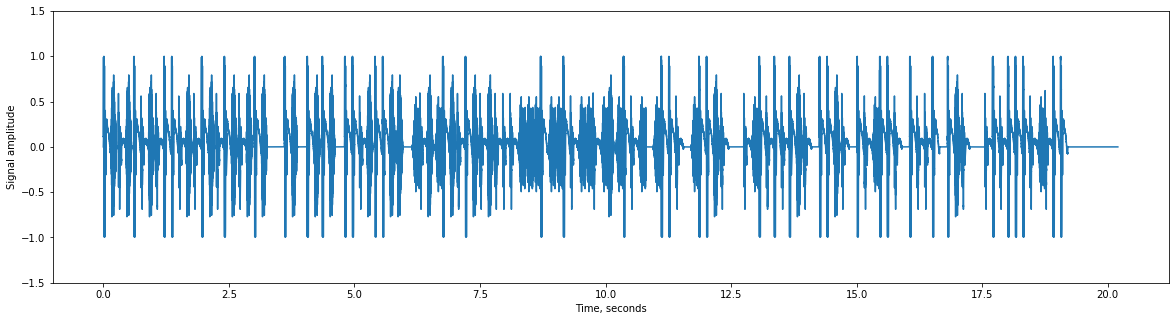

In [29]:
vxsu.plot_track(sound_track)

In [30]:
vxsu.play_audio(sound_track)